In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

In [108]:
crop_rec = pd.read_csv("Crop_recommendation.csv")   
crop_yield = pd.read_csv("crop_yield.csv")          
fertilizer = pd.read_csv("Fertilizer.csv")    

In [109]:
crop_rec.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [110]:
fertilizer.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [133]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_enc,State_enc,Season_enc
0,arecanut,1997,whole year,assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0,2,4
1,arhar/tur,1997,kharif,assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,1,2,1
2,castor seed,1997,kharif,assam,796.0,22,2051.4,75755.32,246.76,0.238333,8,2,1
3,coconut,1997,whole year,assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,9,2,4
4,cotton(lint),1997,kharif,assam,1739.0,794,2051.4,165500.63,539.09,0.420909,11,2,1


In [134]:
crop_rec['label'] = crop_rec['label'].str.strip().str.lower()
crop_yield['Crop'] = crop_yield['Crop'].str.strip().str.lower()
crop_yield['State'] = crop_yield['State'].str.strip().str.lower()
crop_yield['Season'] = crop_yield['Season'].str.strip().str.lower()
fertilizer['Fertilizer Name'] = fertilizer['Fertilizer Name'].str.strip().str.lower()

In [135]:
X_crop = crop_rec[['N','P','K','temperature','humidity','ph','rainfall']]
y_crop = crop_rec['label']
le_crop = LabelEncoder()
y_crop_enc = le_crop.fit_transform(y_crop)

X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop_enc, test_size=0.2, random_state=42
)

In [113]:

clf_crop = RandomForestClassifier(random_state=42)
clf_crop.fit(X_train_crop, y_train_crop)
y_pred_crop = clf_crop.predict(X_test_crop)

# Accuracy & Confusion Matrix
acc_crop = accuracy_score(y_test_crop, y_pred_crop)
print("🌿 Crop Recommendation Accuracy:", round(acc_crop,3))

🌿 Crop Recommendation Accuracy: 0.993


/home/rgukt-basar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


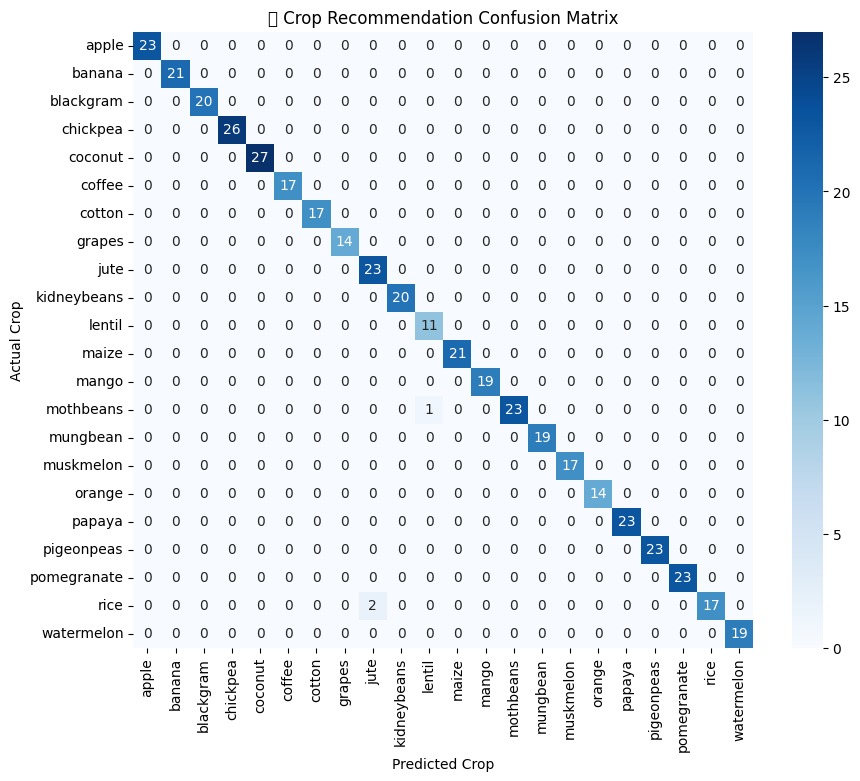

In [114]:
cm = confusion_matrix(y_test_crop, y_pred_crop)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_crop.classes_, yticklabels=le_crop.classes_)
plt.title("🌾 Crop Recommendation Confusion Matrix")
plt.ylabel("Actual Crop")
plt.xlabel("Predicted Crop")
plt.show()

In [115]:
# Encode crop, state, season
le_crop_yield = LabelEncoder()
crop_yield['Crop_enc'] = le_crop_yield.fit_transform(crop_yield['Crop'])

le_state = LabelEncoder()
crop_yield['State_enc'] = le_state.fit_transform(crop_yield['State'])

le_season = LabelEncoder()
crop_yield['Season_enc'] = le_season.fit_transform(crop_yield['Season'])

X_prod = crop_yield[['Crop_enc','State_enc','Area','Season_enc']]
y_prod = crop_yield['Production']
y_yield = crop_yield['Yield']

In [116]:
# Split dataset for production
X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(X_prod, y_prod, test_size=0.2, random_state=42)
reg_prod = RandomForestRegressor(random_state=42)
reg_prod.fit(X_train_prod, y_train_prod)

RandomForestRegressor(random_state=42)

In [117]:
pred_prod = reg_prod.predict(X_test_prod)
r2_prod = r2_score(y_test_prod, pred_prod)
print("🏭 Production R² Score:", round(r2_prod,3))

🏭 Production R² Score: 0.988


/home/rgukt-basar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


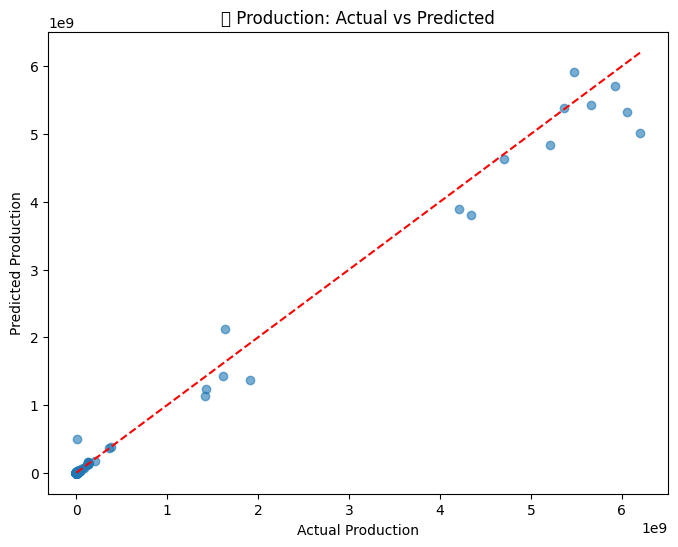

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_prod, pred_prod, alpha=0.6)
plt.plot([y_test_prod.min(), y_test_prod.max()], [y_test_prod.min(), y_test_prod.max()], 'r--')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("🌾 Production: Actual vs Predicted")
plt.show()

In [119]:
# Split dataset for yield
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X_prod, y_yield, test_size=0.2, random_state=42)
reg_yield = RandomForestRegressor(random_state=42)
reg_yield.fit(X_train_yield, y_train_yield)

RandomForestRegressor(random_state=42)

In [120]:
 pred_yield = reg_yield.predict(X_test_yield)
r2_yield = r2_score(y_test_yield, pred_yield)
print("📊 Yield R² Score:", round(r2_yield,3))

📊 Yield R² Score: 0.973


/home/rgukt-basar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


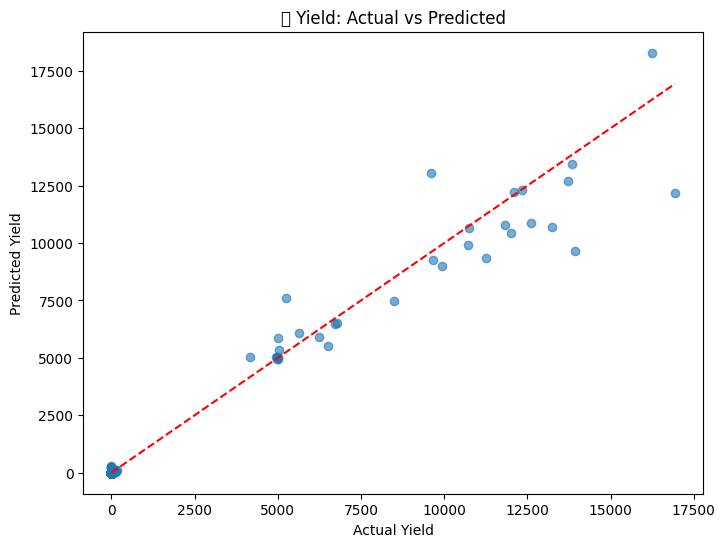

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_yield, pred_yield, alpha=0.6)
plt.plot([y_test_yield.min(), y_test_yield.max()], [y_test_yield.min(), y_test_yield.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("📈 Yield: Actual vs Predicted")
plt.show()

In [122]:
def recommend_fertilizer(N, P, K, crop_name=None):
    if crop_name:
        f = fertilizer[fertilizer['Fertilizer Name'].str.contains(crop_name, case=False, na=False)]
        if not f.empty:
            return f['Fertilizer Name'].values[0]
    # fallback: closest NPK match
    fertilizer['diff'] = np.sqrt(
        (fertilizer['Nitrogen'] - N)**2 +
        (fertilizer['Phosphorous'] - P)**2 +
        (fertilizer['Potassium'] - K)**2
    )
    best = fertilizer.loc[fertilizer['diff'].idxmin()]
    return best['Fertilizer Name']

In [128]:
soil_input = [90, 940, 50, 26, 80, 6.5, 150]  # N,P,K,temp,humidity,pH,rainfall
area_input = 2.5
state_input = 'goa'
season_input = 'winter'

In [129]:

# Predict crop
pred_crop_code = clf_crop.predict([soil_input])[0]
pred_crop_name = le_crop.inverse_transform([pred_crop_code])[0]

/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [130]:
# Predict production & yield
crop_enc = le_crop_yield.transform([pred_crop_name])[0]
state_enc = le_state.transform([state_input.strip().lower()])[0]
season_enc = le_season.transform([season_input.strip().lower()])[0]
X_pred_prod = [[crop_enc, state_enc, area_input, season_enc]]

pred_production = reg_prod.predict(X_pred_prod)[0]
pred_yield_val = reg_yield.predict(X_pred_prod)[0]

/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [131]:
# Fertilizer recommendation
fert_reco = recommend_fertilizer(soil_input[0], soil_input[1], soil_input[2], pred_crop_name)

In [132]:
print("\n✅ Recommended Crop:", pred_crop_name.title())
print("🌾 Predicted Production:", round(pred_production,2))
print("📈 Predicted Yield:", round(pred_yield_val,2))
print("💧 Recommended Fertilizer:", fert_reco.title())


✅ Recommended Crop: Banana
🌾 Predicted Production: 1894.84
📈 Predicted Yield: 8.49
💧 Recommended Fertilizer: Dap
